In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
data = pd.read_csv("subaru_stats.csv")
data.head()

,engine_displacement,horsepower,torque,fuel_efficiency,model,weight,price
0,2.349080,44.279264,75.761810,38.395151,2.0,3825.0,28675.731600
1,3.501429,51.801143,71.376071,27.621470,5.0,4098.0,27250.658263
2,3.063988,78.451190,72.047991,33.888608,1.0,3412.0,29005.166744
3,2.797317,80.237854,52.597988,46.135067,4.0,4399.0,24715.721511
4,1.912037,41.729630,81.684028,45.922855,4.0,4443.0,29182.639156


In [3]:
# Encode the 'model' column into  numerical format using OrdinalEncoder
encoder = OrdinalEncoder()
data['model'] = encoder.fit_transform(data[['model']])


In [4]:
# Shuffle the data
data_randomized = data.sample(frac=1, random_state=142).reset_index(drop=True)

In [5]:
data_randomized.head()

,engine_displacement,horsepower,torque,fuel_efficiency,model,weight,price
0,3.170352,41.336282,62.877764,37.136013,3.0,3866.0,29262.197729
1,2.142698,64.514158,73.857024,28.931148,0.0,4065.0,29270.124878
2,1.668777,74.535022,59.001583,52.759272,5.0,3717.0,31131.974949
3,3.497771,41.398217,76.623328,53.271948,5.0,3698.0,26834.679723
4,2.846596,39.877277,80.884947,30.981416,5.0,4253.0,28396.675110


In [6]:
# Helper function to return percentage of a value
def return_percentage(value: float, perc: float) -> int:
    return round(value * perc)

In [7]:
# Splitting the data into training and testing
test_data = data_randomized[:return_percentage(len(data_randomized), 0.80)]  # 20% of the data for testing
train_data = data_randomized[return_percentage(len(data_randomized), 0.20):]  # 80% for training

In [8]:
# Splitting data into X (features) and y (target)
y_train = train_data.iloc[:, -1]
x_train = train_data.iloc[:, :-1]

y_test = test_data.iloc[:, -1]
x_test = test_data.iloc[:, :-1]

In [9]:
y_train

20    24331.611079
21    32494.110144
22    26215.523229
23    29182.639156
24    27453.202329
          ...     
95    29415.228493
96    29905.588295
97    29700.165371
98    24607.807155
99    29194.613146
Name: price, Length: 80, dtype: float64

In [10]:
# Training the model using Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# Printing the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  51.67507995  -26.5401686    -2.42346772   14.35250851 -110.50523875
   -0.7084111 ]
Model Intercept: 32258.23943442856


In [12]:
# Testing the model
model_score = model.score(x_test, y_test)
print("Model R² Score:", model_score)

Model R² Score: 0.07659060221899261


In [13]:
# Making predictions
predictions = model.predict(x_test)
print("Predictions:", predictions[:10])  # Display the first 10 predictions

Predictions: [28635.37544461 28013.30021161 27794.85081953 28746.93287731
 28030.2282555  28539.7474998  27696.24279078 27567.25935596
 28976.98786518 28047.59915872]


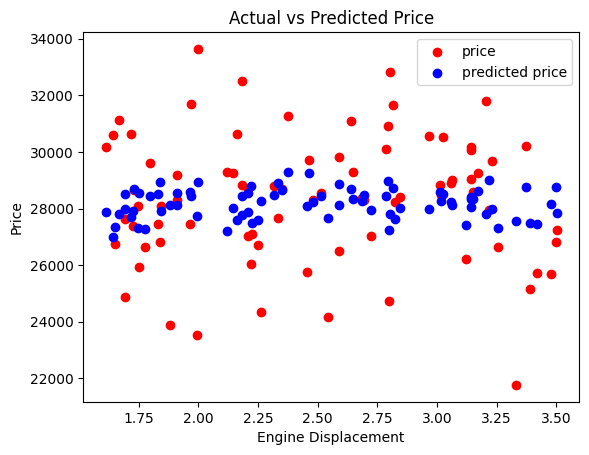

In [14]:
# Plotting the actual vs predicted ranks
plt.scatter(x_test['engine_displacement'], y_test, color='red', label="price")
plt.scatter(x_test['engine_displacement'], predictions, color='blue', label="predicted price")
plt.xlabel('Engine Displacement')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

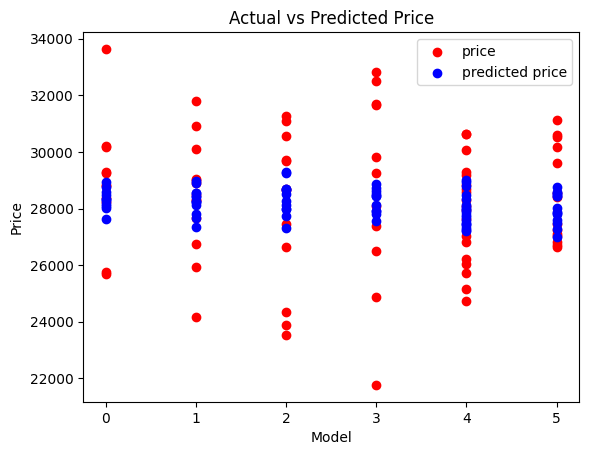

In [15]:
# plotting based on the model
plt.scatter(x_test['model'], y_test, color='red', label="price")
plt.scatter(x_test['model'], predictions, color='blue', label="predicted price")
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()